# QTM 151 Final Project

## How Home Country Races Impact F1 Driver Performance

### Ajay Kartik, Joshua Han, and Jayden Bai (Section 1)

## Introduction

Formula 1, or F1, is a motorsport competition sanctioned by the Fédération Internationale de l'Automobile where teams race each other in open-wheel, high-speed cars. One season consists of a series of races, called Grand Prix. The two biggest championships are the Drivers' Championship and the Constructors' Championship. We hypothesize that there is a potential existence of a "home race advantage" -- that drivers might perform statistically better when racing in their home country. This project will investigate this hypothesis and seek to provide meaningful data, graphs, and conclusions. This question is relevant as it can be applied to most sports, and it can uncover factors past just their pure skill, which we find intriguing and interesting.

Our goal with this analysis is to investigate whether F1 drivers experience a "home race advantage." By merging and analyzing multiple tables from the dataset, we will compare the average points scored by drivers in home races with their performance in all other races. Looking at the CATE (conditioning on nationality), we find that drivers tend to perform the same or even worse at home.

## Data Description

We will be using four tables from the dataset: *circuits*, *drivers*, *races*, and *results*.

Each row in the *circuits* table contains information about a single race track (circuit), including its name, location, and country. There are 77 circuits in this table. 

Each row in the *drivers* table contains information about a driver: their name, nationality, and date of birth. There are 857 drivers in this table. 

Each row in the *races* table contains information about a specific race, including that year, round, and circuit where it is. There are 1102 races in this table. 

Each row in the *results* table contains a driver's result in a specific race, including their finishing position, points scored, and grid position. There are 25840 results in this table. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read CSV files
drivers_df = pd.read_csv('data_raw/drivers.csv')
races_df = pd.read_csv('data_raw/races.csv')
circuits_df = pd.read_csv('data_raw/circuits.csv')
results_df = pd.read_csv('data_raw/results.csv')

drivers_df.head()

## Project Design

### Map: 

Let's do an analysis of the entire season's races and have a treatment T=1 for if the driver's nationality matches the location of the race and T=0 for if the driver's nationality does not match the location of the race.

This means we can have average treatment effects for each nationality. This also means we'd probably have to calculate the ATE of the average performance of each driver when they are T=0 vs. the aveage performance of each driver when they are T=1 for each nationality that has T=1. 

### Performance Metrics:

We'll start with measuring points earned as the metric of success from a race. 

### Potential concerns:

Confounding Variables - team performance, car quality, weather conditions, driver experience, etc. are all possible and could be linked to the location of the race. 

Data Limitations - some nationalities may have very few home races, and some drivers may have very few races overall. 

Causal Assumptions - drivers from the same country or team influencing each other would confound some of our estimated treatment effect. 



## Merging Prodecures

We merged the races_df, locations_df (circuitId and country columns), results_df, and drivers_df (driverId, surname, and nationality columns) datasets together. We also created a dictionary to map location in circuits_df to nationality in driver_df. 

## Main Columns

The main columns we wanted to focus on were raceId, name, country_standardized, surname, nationality, and is_home_race. raceId tells us which race it is, name tells us the name of the circuit, country_standardized tells us which country the race is in, surname tells us the driver's name, nationality tells us the driver's nationality, and is_home_race tells us if the country_standardized matches nationality. 

In [5]:
# Matching dictionary made by hand to map circuits.csv location to driver.csv to nationality
country_to_nationality = {
    'Australia': 'Australian',
    'United States': 'American',
    'USA': 'American',
    'UK': 'British',
    'United Kingdom': 'British',
    'Great Britain': 'British',
    'Monaco': 'Monegasque',
    'Netherlands': 'Dutch',
    'Spain': 'Spanish',
    'France': 'French',
    'Germany': 'German',
    'Italy': 'Italian',
    'Japan': 'Japanese',
    'Brazil': 'Brazilian',
    'Canada': 'Canadian',
    'Mexico': 'Mexican',
    'Austria': 'Austrian',
    'Belgium': 'Belgian',
    'Finland': 'Finnish',
    'Switzerland': 'Swiss',
    'Denmark': 'Danish',
    'Russia': 'Russian',
    'China': 'Chinese',
    'South Korea': 'Korean',
    'Malaysia': 'Malaysian',
    'Singapore': 'Singaporean',
    'Abu Dhabi': 'Emirati',  # For UAE
    'UAE': 'Emirati',
    'United Arab Emirates': 'Emirati',
    'Bahrain': 'Bahraini',
    'Saudi Arabia': 'Saudi',
    'Qatar': 'Qatari',
    'Portugal': 'Portuguese',
    'Hungary': 'Hungarian',
    'Azerbaijan': 'Azerbaijani',
    'Turkey': 'Turkish'
}

# Standardizes country names 
def standardize_country(country):
    return country_to_nationality.get(country, country)

In [7]:
# Actual Merging

# Merging races_df with circuits_df with country to get race locations
races_with_locations = pd.merge(
    races_df,
    circuits_df[['circuitId', 'country']],
    on='circuitId',
    how='left'
)

# Run function to standardize country names
races_with_locations['country_standardized'] = races_with_locations['country'].apply(standardize_country)

# Then merge with results to get driver performances
races_with_results = pd.merge(
    races_with_locations,
    results_df,
    on='raceId',
    how='left'
)

# Finally merge with drivers to get driver nationalities
final_dataset = pd.merge(
    races_with_results,
    drivers_df[['driverId', 'surname', 'nationality']],
    on='driverId',
    how='left'
)

# Create the treatment variable using standardized country names
final_dataset['is_home_race'] = (final_dataset['nationality'] == final_dataset['country_standardized']).astype(int)

print("\nFinal merged dataset:")
display(final_dataset[['raceId', 'name', 'country', 'country_standardized', 'surname', 'nationality', 'is_home_race']].head())

print("\nNationalities with home races:")
display(final_dataset[final_dataset['is_home_race'] == 1]['nationality'].value_counts().head(10))

# Display the first 5 home races
print("\nFirst 5 home races (is_home_race = 1):")
home_races = final_dataset[final_dataset['is_home_race'] == 1]
display(home_races[['name', 'country', 'country_standardized', 'surname', 'nationality', 'is_home_race']].head())


Final merged dataset:


,raceId,name,country,country_standardized,surname,nationality,is_home_race
0,1,Australian Grand Prix,Australia,Australian,Button,British,0
1,1,Australian Grand Prix,Australia,Australian,Barrichello,Brazilian,0
2,1,Australian Grand Prix,Australia,Australian,Trulli,Italian,0
3,1,Australian Grand Prix,Australia,Australian,Glock,German,0
4,1,Australian Grand Prix,Australia,Australian,Alonso,Spanish,0



Nationalities with home races:


nationality
American     521
British      482
Italian      466
French       219
German       208
Brazilian    119
Belgian       66
Spanish       61
Japanese      54
Canadian      32
Name: count, dtype: int64


First 5 home races (is_home_race = 1):


,name,country,country_standardized,surname,nationality,is_home_race
11,Australian Grand Prix,Australia,Australian,Webber,Australian,1
84,Spanish Grand Prix,Spain,Spanish,Alonso,Spanish,1
145,British Grand Prix,UK,British,Button,British,1
155,British Grand Prix,UK,British,Hamilton,British,1
161,German Grand Prix,Germany,German,Vettel,German,1


## Cleaning Procedures

We cleaned the points column by converting all values to numeric, errors to NaN, and missing values to 0. This ensured the data was properly formatted for calculating average points in home and away races.


In [8]:
# Clean points column
final_dataset['points'] = pd.to_numeric(final_dataset['points'], errors='coerce').fillna(0)

# Calculate overall ATE
# This is the difference in mean points between home and away races
home_race_mean = final_dataset[final_dataset['is_home_race'] == 1]['points'].mean()
away_race_mean = final_dataset[final_dataset['is_home_race'] == 0]['points'].mean()
overall_ate = home_race_mean - away_race_mean

print(f"Overall ATE: {overall_ate:.3f} points")
print(f"Mean points in home races: {home_race_mean:.3f}")
print(f"Mean points in away races: {away_race_mean:.3f}")


Overall ATE: -0.736 points
Mean points in home races: 1.207
Mean points in away races: 1.943


## Results

We were surprised with the results; they indicate that there is no consistent home race advantage in F1. In fact, the opposite trend is observed. On average, drivers score about .75 points lower in home races than away races. This evidence was furthered when we conditioned on nationality. The majority of nationalities show a negligible or negative effect, meaning that drivers tend to perform the same or worse at home. Only a few nationalities show a slight positive effect (Russia, Japan, and Spain). 


Conditional Average Treatment Effects by Nationality:


,nationality,cate,home_mean,away_mean,n_home_races,n_away_races
19,Russian,0.515854,1.750000,1.234146,8,205
5,Japanese,0.313412,0.685185,0.371773,54,581
1,Spanish,0.306532,3.819672,3.513141,61,761
11,Malaysian,0.000000,0.000000,0.000000,1,15
6,Brazilian,-0.005100,1.747899,1.752999,119,1834
10,Hungarian,-0.055556,0.000000,0.055556,2,18
4,Italian,-0.069208,0.537554,0.606762,466,2952
18,Swiss,-0.088549,0.615385,0.703934,13,483
13,Portuguese,-0.098765,0.000000,0.098765,6,81
7,French,-0.110752,1.050228,1.160980,219,2785


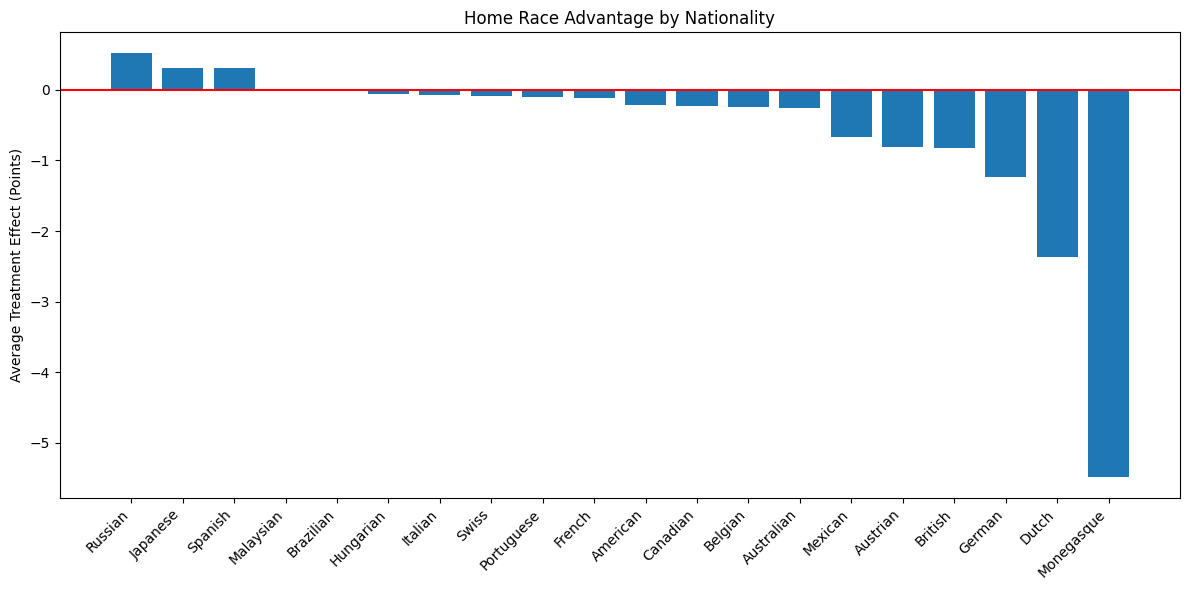

In [9]:
# Calculate CATEs by nationality
# All nationalities with home races
nationalities_with_home_races = final_dataset[final_dataset['is_home_race'] == 1]['nationality'].unique()

# Create a DataFrame to store CATE results
cate_results = []

for nationality in nationalities_with_home_races:
    # Filter data for this nationality
    nationality_data = final_dataset[final_dataset['nationality'] == nationality]
    
    # Calculate means for this nationality
    home_mean = nationality_data[nationality_data['is_home_race'] == 1]['points'].mean()
    away_mean = nationality_data[nationality_data['is_home_race'] == 0]['points'].mean()
    cate = home_mean - away_mean
    
    # Count number of home and away races
    n_home = len(nationality_data[nationality_data['is_home_race'] == 1])
    n_away = len(nationality_data[nationality_data['is_home_race'] == 0])
    
    cate_results.append({
        'nationality': nationality,
        'cate': cate,
        'home_mean': home_mean,
        'away_mean': away_mean,
        'n_home_races': n_home,
        'n_away_races': n_away
    })

# Convert to DataFrame and sort by CATE
cate_df = pd.DataFrame(cate_results)
cate_df = cate_df.sort_values('cate', ascending=False)

# Display results
print("\nConditional Average Treatment Effects by Nationality:")
display(cate_df)

# Create a visualization of CATEs
plt.figure(figsize=(12, 6))
plt.bar(cate_df['nationality'], cate_df['cate'])
plt.axhline(y=0, color='r', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.title('Home Race Advantage by Nationality')
plt.ylabel('Average Treatment Effect (Points)')
plt.tight_layout()
plt.show()

## Discussion

Suprisingly, by looking at the CATE (conditioning on nationality), we found that drivers tend to perform the same or even worse at home. These findings suggest that racing at home comes with its costs: pressure, expectations from fans, and perhaps other distractions. The results could be influenced by the relatively small number of home races for certain nationalities leading to skewed results (e.g. Monegasque).